In [1]:

import os
import cv2
import random
import numpy as np
from numpy.lib.stride_tricks import as_strided

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

import matplotlib.pyplot as plt

import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Conv2D, MaxPooling2D, AveragePooling2D, Dropout, Flatten

from PIL import Image



Using TensorFlow backend.
/home/ahmed/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/ahmed/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/ahmed/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/ahmed/anaconda3/lib/python3.7/site-packages/tensorflo

In [2]:


data_set = []
data_label = []
training_data = []
CATEGORIES = ["no", "yes"]
input_path = '/home/ahmed/Downloads/try2/'

for category in CATEGORIES:
    path = os.path.join(input_path, category)
    category_index = CATEGORIES.index(category)
    
    for image in os.listdir(path):
        try:
            img_array = cv2.imread(os.path.join(path, image), cv2.IMREAD_GRAYSCALE)
            img_array = img_array.astype(np.float32)
        
            
            img_array = cv2.resize(img_array, (256, 256))
            training_data.append([img_array, category_index])
        except Exception as e:
            print(e)


random.shuffle(training_data)




In [3]:


for feature, label in training_data:
    data_set.append(feature)
    data_label.append(label)
    

x_train, x_test, y_train, y_test = train_test_split(data_set, data_label, test_size = 0.1, 
                                                    random_state = 45)

data_set = np.array(x_train).reshape(-1, 256, 256, 1)

x_test = np.array(x_test).reshape(-1, 256, 256, 1)

data_set = data_set/255.0


In [4]:



BT = Sequential()
BT.add(Conv2D(128, (3,3), input_shape = data_set.shape[1:]))
BT.add(Activation("relu"))
BT.add(AveragePooling2D(pool_size = (2,2)))

BT.add(Conv2D(128, (3,3)))
BT.add(Activation("relu"))
BT.add(AveragePooling2D(pool_size = (2,2)))

BT.add(Flatten())
BT.add(Dense(64))

BT.add(Dense(1))
BT.add(Activation("sigmoid"))


BT.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ['accuracy'])

BT.fit(data_set, y_train, batch_size = 32, epochs = 15, validation_split = 0.1)

score = BT.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

y_pred_keras = BT.predict(x_test).ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, y_pred_keras)

auc_keras = auc(fpr_keras, tpr_keras)




Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 204 samples, validate on 23 samples
Epoch 1/15
204/204 [==============================] - 27s 131ms/step - loss: 7.2944 - accuracy: 0.5392 - val_loss: 0.4967 - val_accuracy: 0.7826
Epoch 2/15
204/204 [==============================] - 27s 135ms/step - loss: 0.5581 - accuracy: 0.7451 - val_loss: 0.3871 - val_accuracy: 0.8696
Epoch 3/15
204/204 [==============================] - 28s 136ms/step - loss: 0.5210 - accuracy: 0.7696 - val_loss: 0.3811 - val_accuracy: 0.8696
Epoch 4/15
204/204 [==============================] - 27s 135ms/step - loss: 0.4036 - accuracy: 0.8284 - val_loss: 0.3630 - val_accuracy: 0.8696
Epoch 5/15
204/204 [==============================] - 29s 144ms/step - loss: 0.3308 - accuracy: 0.8676 - val_loss: 0.3604 - val_accuracy: 0.9130
Epoch 6/15
204/204 [==============================] - 28s 137ms/step - loss: 0.2685 - accuracy: 0.8922 - val_loss: 0.3913 - val_accura

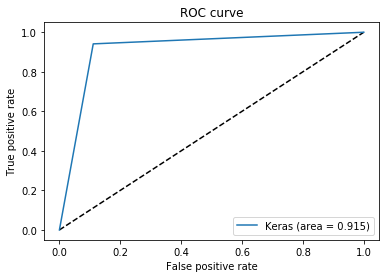

Baseline Error: 7.69%


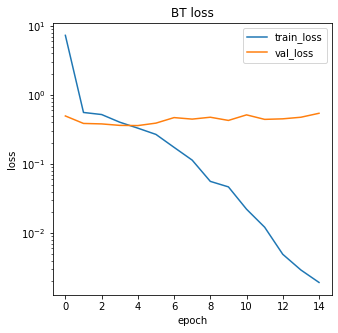

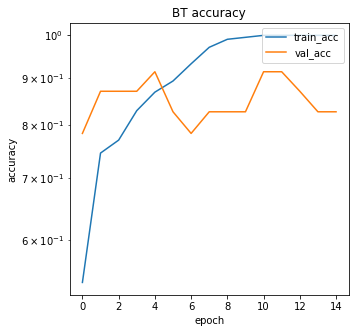

In [7]:

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

plt.figure(figsize=(5, 5))
plt.semilogy(BT.history.history['loss'])
plt.semilogy(BT.history.history['val_loss'])
plt.title('BT loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss', 'val_loss'], loc='upper right');

plt.figure(figsize=(5, 5))
plt.semilogy(BT.history.history['accuracy'])
plt.semilogy(BT.history.history['val_accuracy'])
plt.title('BT accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train_acc', 'val_acc'], loc='upper right');
# Final evaluation of the BT1
scores = BT.evaluate(x_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))
